# Capstone Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
df.shape

(194673, 38)

In [7]:
nulls = df.isnull().sum(axis=0)
nulls

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [8]:
ndf = df.drop(columns = [column for column in df.columns.values[nulls >= 70000]])

In [9]:
nulls = ndf.isnull().sum(axis=0)
nulls

SEVERITYCODE         0
X                 5334
Y                 5334
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
ADDRTYPE          1926
LOCATION          2677
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
INCDTTM              0
JUNCTIONTYPE      6329
SDOT_COLCODE         0
SDOT_COLDESC         0
UNDERINFL         4884
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
ST_COLCODE          18
ST_COLDESC        4904
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

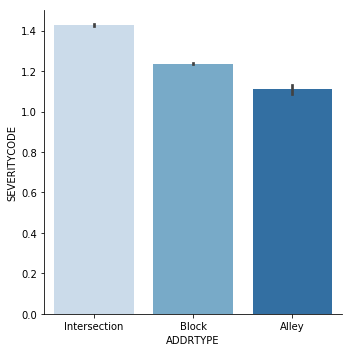

In [52]:
sns.catplot(x="ADDRTYPE", y="SEVERITYCODE", kind="bar", palette="Blues", data=ndf);

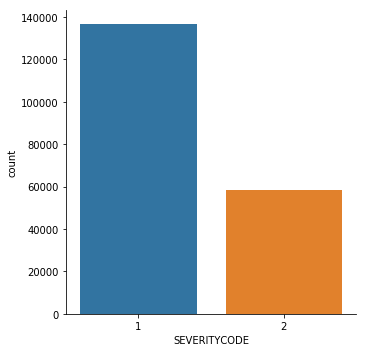

In [47]:
sns.catplot(x="SEVERITYCODE", kind="count", data=ndf);

In [11]:
ndf.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.019586,0.048063
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.001810,0.565326
PEDCYLCOUNT,0.214218,-0.001752,0.026304,0.034432,0.031342,0.031296,0.214218,-0.038809,-0.016920,1.000000,-0.253773,0.382521,0.453657,0.109820


We can see that first 5 colummns are not so much correlated with SEVERITYCODE, so i decided not to include them into features.

I also drop SEVERITYCODE.1 because it is copy of SEVERITYCODE

In [12]:
features = ndf.drop(columns = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'SEVERITYCODE.1'])
features.head()

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N
1,1,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N
2,1,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N
3,1,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N
4,2,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,0,0,N


In [13]:
features.dtypes[features.dtypes == 'object']

REPORTNO         object
STATUS           object
ADDRTYPE         object
LOCATION         object
SEVERITYDESC     object
COLLISIONTYPE    object
INCDATE          object
INCDTTM          object
JUNCTIONTYPE     object
SDOT_COLDESC     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE       object
ST_COLDESC       object
HITPARKEDCAR     object
dtype: object

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
features.head()

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N
1,1,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N
2,1,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N
3,1,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N
4,2,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,0,0,N


In [16]:
features[features.columns.values[features.dtypes == 'object']].nunique()

REPORTNO         194670
STATUS                2
ADDRTYPE              3
LOCATION          24102
SEVERITYDESC          2
COLLISIONTYPE        10
INCDATE            5985
INCDTTM          162058
JUNCTIONTYPE          7
SDOT_COLDESC         39
UNDERINFL             4
WEATHER              11
ROADCOND              9
LIGHTCOND             9
ST_COLCODE          115
ST_COLDESC           62
HITPARKEDCAR          2
dtype: int64

In [17]:
features.drop(columns = ['REPORTNO'], inplace = True)

In [18]:
features.head()

,SEVERITYCODE,STATUS,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Matched,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N
1,1,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N
2,1,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N
3,1,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N
4,2,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,0,0,N


In [19]:
features1 = features
for column in features.columns.values[features.dtypes == 'object']:
    if features[column].nunique() <= 11:
        features1 = pd.concat([features1, pd.get_dummies(features[[column]])], axis = 1)
        features1.drop(columns = [column], inplace = True)
features1

,SEVERITYCODE,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,STATUS_Matched,STATUS_Unmatched,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,SEVERITYDESC_Injury Collision,SEVERITYDESC_Property Damage Only Collision,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,UNDERINFL_0,UNDERINFL_1,UNDERINFL_N,UNDERINFL_Y,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,HITPARKEDCAR_N,HITPARKEDCAR_Y
0,2,5TH AVE NE AND NE 103RD ST,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",10,Entering at angle,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",11,From same direction - both going straight - bo...,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",32,One parked--one moving,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,2ND AVE BETWEEN MARION ST AND MADISON ST,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",23,From same direction - all others,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,SWIFT AVE S AND SWIFT AV OFF RP,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",10,Entering at angle,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
5,1,24TH AVE NW AND NW 85TH ST,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",10,Entering at angle,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6,1,DENNY WAY AND WESTLAKE AVE,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",10,Entering at angle,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
7,2,BROADWAY AND E PIKE ST,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,5,Vehicle Strikes Pedalcyclist,6855,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8,1,PINE ST BETWEEN 5TH AVE AND 6TH AVE,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END .

In [20]:
features1[features1.columns.values[features1.dtypes == 'object']].nunique()

LOCATION         24102
INCDATE           5985
INCDTTM         162058
SDOT_COLDESC        39
ST_COLCODE         115
ST_COLDESC          62
dtype: int64

In [21]:
features1.drop(columns = ['LOCATION', 'INCDATE', 'INCDTTM', 'SDOT_COLDESC', 'ST_COLDESC'], inplace = True)

In [22]:
features1.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,STATUS_Matched,STATUS_Unmatched,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,SEVERITYDESC_Injury Collision,SEVERITYDESC_Property Damage Only Collision,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,UNDERINFL_0,UNDERINFL_1,UNDERINFL_N,UNDERINFL_Y,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,HITPARKEDCAR_N,HITPARKEDCAR_Y
SEVERITYCODE,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.104276,0.175093,0.030967,-0.030967,-0.025790,-0.184745,0.199089,1.000000,-1.000000,0.095607,0.213271,0.029540,0.057692,-0.033384,-0.304148,0.245441,0.132313,-0.025194,-0.116638,-0.000445,0.201628,0.002190,0.016929,-0.167415,0.001685,-0.001139,-0.030285,0.033946,0.020746,0.028511,-0.001150,0.059436,0.003518,-0.022824,0.014813,0.003333,0.037883,-0.000468,-0.002691,-0.016495,-0.155038,0.066558,-0.012623,0.003015,0.001528,0.000333,-0.020851,-0.002020,-0.157748,0.040895,-0.015901,-0.006079,-0.000618,0.001063,0.007586,0.087616,0.011773,-0.005895,-0.151296,0.101498,-0.101498
PERSONCOUNT,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,-0.021383,-0.032258,0.067552,-0.067552,-0.025228,-0.056826,0.067153,0.130949,-0.130949,0.092539,-0.039677,0.021879,0.053115,-0.175667,-0.089369,-0.037342,0.139386,0.025008,0.042726,0.000281,0.068239,0.003446,0.044499,-0.071390,0.000160,-0.002807,0.039360,0.019827,-0.027167,0.012034,-0.002450,0.047065,-0.005930,-0.018181,0.011011,0.000586,0.022984,-0.002058,-0.000193,-0.004321,-0.086301,0.053350,-0.013715,-0.004725,-0.005522,-0.006677,-0.002249,-0.008499,-0.086467,0.023244,-0.015269,-0.005750,0.017093,-0.003498,-0.019821,0.054236,0.010907,-0.008732,-0.081919,0.052766,-0.052766
PEDCOUNT,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.001810,0.565326,0.030077,-0.030077,0.003809,-0.140409,0.144936,0.246338,-0.246338,-0.083188,-0.016255,-0.019212,-0.049346,-0.064159,-0.102872,0.946507,-0.084517,-0.022214,-0.059348,-0.015295,0.149797,-0.012336,-0.052848,-0.089452,-0.002811,-0.001274,-0.026682,0.011086,0.028680,0.012082,-0.001651,0.004113,0.001377,-0.002742,0.001315,-0.000950,0.032832,-0.002124,0.001941,-0.004068,-0.036690,0.006144,-0.006567,-0.003399,-0.002890,-0.001038,-0.004085,-0.002423,-0.035785,0.028607,0.002612,0.002144,0.030356,0.005489,0.010835,-0.001915,0.005413,-0.002036,-0.039260,0.035264,-0.035264
PEDCYLCOUNT,0.214218,-0.038809,-0.016920,1.000000,-0.253773,0.382521,0.453657,0.109820,0.027214,-0.027214,-0.006594,-0.080428,0.085377,0.214218,-0.214218,-0.077584,0.987664,-0.017080,-0.044987,-0.062488,-0.096571,-0.031111,-0.077572,-0.020305,-0.054613,-0.007597,0.087869,0.036267,-0.037892,-0.064170,-0.002852,-0.001153,-0.028884,-0.013943,0.043904,-0.009300,-0.001067,0.051439,-0.006340,-0.007818,0.001771,-0.000859,-0.027840,-0.001922,-0.002813,-0.010702,-0.036196,0.057838,-0.009110,-0.003075,-0.002060,-0.000202,-0.010497,-0.000335,-0.035134,-0.029357,-0.003688,-0.001977,-0.031864,0.002807,0.010

In [23]:
features1 = features1[~features1['ST_COLCODE'].isnull()]

In [24]:
features1.drop(columns = ['ST_COLCODE'], inplace = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
features1.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SEGLANEKEY,CROSSWALKKEY,STATUS_Matched,STATUS_Unmatched,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,SEVERITYDESC_Injury Collision,SEVERITYDESC_Property Damage Only Collision,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,UNDERINFL_0,UNDERINFL_1,UNDERINFL_N,UNDERINFL_Y,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,HITPARKEDCAR_N,HITPARKEDCAR_Y
0,2,2,0,0,2,11,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,2,0,0,2,16,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,1,4,0,0,3,14,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,3,0,0,3,11,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,2,0,0,2,11,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [26]:
features1.shape

(194655, 67)

In [27]:
from sklearn.preprocessing import StandardScaler
X = features1.iloc[:, 1:]
y = features1.iloc[:, 0]
X = StandardScaler().fit_transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.33020865, -0.18743926, -0.16933989,  0.12541852, -0.41749709,
        -0.08121395, -0.1353679 ,  0.16047585, -0.16047585, -0.06223384,
        -1.3688892 ,  1.41142286,  1.5316739 , -1.5316739 ,  2.14798988,
        -0.16915809, -0.10250432, -0.27518587, -0.37236132, -0.57199748,
        -0.18745706, -0.4607741 , -0.12417732, -0.32512356, -0.10438139,
         1.44906844, -0.24083108, -0.36414843, -0.92539178, -0.02921504,
        -0.00679984, -0.83880847, -0.14475334,  0.97034024, -0.16444018,
        -0.01696382, -1.15347295, -0.05414508, -0.06551775,  2.45463386,
        -0.00506825, -0.45295392, -0.01133353, -0.02410086, -0.06842031,
        -0.28990077, -1.33223107, -0.07902281, -0.01813546, -0.02604963,
        -0.01963277, -0.07200406, -0.02431333, -0.28974456,  1.76099637,
        -0.08918321, -0.07872606, -0.57608674, -0.00751754, -0.11408594,
         0.82234666, -0.17681322, -0.0347667 , -0.2726934 ,  0.19620871,
        -0.19620871],
       [-0.33020865, -0.18743

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

In [31]:
yhat_svm = svm.predict(X_test)

In [55]:
print('F1 Score: ', f1_score(y_test, yhat_svm))
print('Jaccard score of svm:', jaccard_similarity_score(y_test, yhat_svm))
print('Log loss of svm:', log_loss(y_test, yhat_svm))

F1 Score:  0.9993804137864007
Jaccard score of svm: 0.9991266674657945
Log loss of svm: 24.332725248298775


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [61]:
yhat_tree = tree.predict(X_test)
print('F1 Score of decision tree: ', f1_score(y_test, yhat_tree))
print('Jaccard score of decision tree:', jaccard_similarity_score(y_test, yhat_tree))
print('Log loss of tree:', log_loss(y_test, yhat_tree, normalize = True))

F1 Score of decision tree:  1.0
Jaccard score of decision tree: 1.0
Log loss of tree: 24.291530930885237


In [36]:
from sklearn.linear_model import LogisticRegression

In [62]:
logreg = LogisticRegression().fit(X_train, y_train)
yhat_logreg = logreg.predict(X_test)
print('F1 Score of logistic regression: ', f1_score(y_test, yhat_logreg))
print('Jaccard score of logistic regression:', jaccard_similarity_score(y_test, yhat_logreg))
print('Log loss of logistic regression:', log_loss(y_test, logreg.predict_proba(X_test), normalize = True))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 Score of logistic regression:  1.0
Jaccard score of logistic regression: 1.0
Log loss of tree: 4.216575848846873e-05
